Membaca Dataset

In [ ]:
#Mengimport library

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

Data Marketing

In [ ]:
#Membaca dan menampilkan dataset
dataset_shopping = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/shopping_data.csv', delimiter=',')
print('Menampilkan dataset untuk 5 baris teratas:')
print('------------------------------------------')
print(dataset_shopping.head())

Menampilkan dataset untuk 5 baris teratas:
------------------------------------------
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
#Melihat tipe data
print('\nMelihat tipe data:')
print('------------------')
dataset_shopping.info()


Melihat tipe data:
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Menentukan statistik deskriptif dataset
print('\nStatistik deskriptif:')
print('---------------------')
print(dataset_shopping.describe())


Statistik deskriptif:
---------------------
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [ ]:
# Menampilkan jumlah nilai null per kolom
print(dataset_shopping.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Range Usia                0
dtype: int64


Menentukan Jumlah Pelanggan Berdasarkan Genre

In [ ]:
##Menghitung jumlah pelanggan berdasarkan Genre
#Mencari pembeli dengan jenis kelamin pria
Male_dataset = dataset_shopping[(dataset_shopping['Genre'] == 'Male')].reset_index()
jumlah_pria = Male_dataset['Genre'].count()
print('Jumlah Pelanggan Pria =', jumlah_pria)

Jumlah Pelanggan Pria = 88


In [ ]:
#Mencari data yang sama pada pembeli dengan jenis kelamin wanita
Female_dataset = dataset_shopping[(dataset_shopping['Genre'] == 'Female')].reset_index()
jumlah_wanita = Female_dataset['Genre'].count()
print('Jumlah Pelanggan Wanita =', jumlah_wanita)

Jumlah Pelanggan Wanita = 112


Visualisasi Persentase Pelanggan Berdasarkan Genre

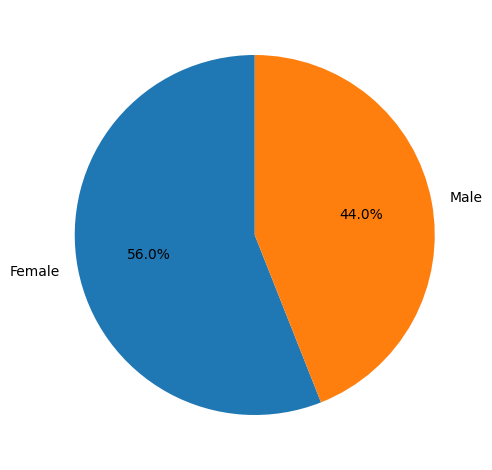

In [ ]:
# Menghitung jumlah pelanggan berdasarkan Genre
jumlah_pelanggan = dataset_shopping.groupby('Genre')['CustomerID'].count().rename('Jumlah pelanggan').reset_index()

# Menampilkan pie chart pembagian data Male dan Female
plt.pie(jumlah_pelanggan['Jumlah pelanggan'], labels=jumlah_pelanggan['Genre'], autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()


Menentukan Segmentasi Genre dan Usia
- Usia di bawah 20 tahun adalah 'remaja'
- Usia 20 - 39 tahun adalah 'dewasa muda'
- Usia 40 - 54 tahun adalah 'dewasa'
- Usia 55 tahun ke atas adalah 'pensiun'

In [ ]:
##Menghitung rentang usia pelanggan masing - masing Genre
#Membagi kelompok usia
def label_usia(row):
    if row['Age'] < 21:
        return 'remaja'
    if row['Age'] < 40:
        return 'dewasa muda'
    if row['Age'] < 55:
        return 'dewasa'
    return 'pensiun'

# Klasifikasikan kolom 'Age' berdasarkan kelompok usia ke dalam kolom 'Range Usia'
dataset_shopping['Range Usia'] = dataset_shopping.apply(lambda row: label_usia(row), axis=1)

# Kelompokkan dataset berdasarkan 'Genre' dan 'Range Usia' dan dihitung agregasi jumlahnya.
shopping_group = dataset_shopping.groupby(['Genre', 'Range Usia'])['CustomerID'].count().rename('Jumlah Pelanggan')

print(shopping_group)

Genre   Range Usia 
Female  dewasa         34
        dewasa muda    61
        pensiun        12
        remaja          5
Male    dewasa         20
        dewasa muda    38
        pensiun        18
        remaja         12
Name: Jumlah Pelanggan, dtype: int64


Visualisasi Segmentasi Genre dan Usia - Pie Chart

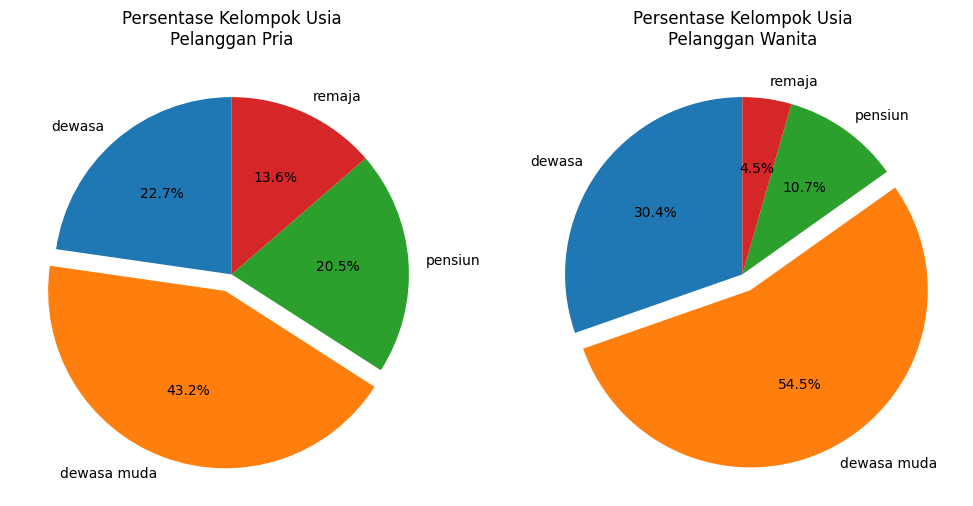

In [ ]:
# Kelompokkan dataset berdasarkan 'Genre' dan 'Range Usia' dan dihitung agregasi
# jumlahnya dan terapkan reset_index()
shopping_group = dataset_shopping.groupby(['Genre', 'Range Usia']) \
    ['CustomerID'].count().rename('Jumlah Pelanggan').reset_index()

# Membagi shopping_group ke masing-masing 'Genre'
Male_group = shopping_group[shopping_group['Genre']=='Male']
Female_group = shopping_group[shopping_group['Genre']=='Female']

#Buatkan canvas untuk menempatkan pie chart
fig, axs = plt.subplots(1, 2, figsize=(10,5))

#Male
axs[0].pie(Male_group['Jumlah Pelanggan'], labels=Male_group['Range Usia'],
        autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0, 0))
axs[0].set_title('Persentase Kelompok Usia\nPelanggan Pria')

#Female
axs[1].pie(Female_group['Jumlah Pelanggan'], labels=Female_group['Range Usia'],
        autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0, 0))
axs[1].set_title('Persentase Kelompok Usia\nPelanggan Wanita')

plt.tight_layout()
plt.show()

Visualisasi Segmentasi Genre dan Usia - Grouped Bar

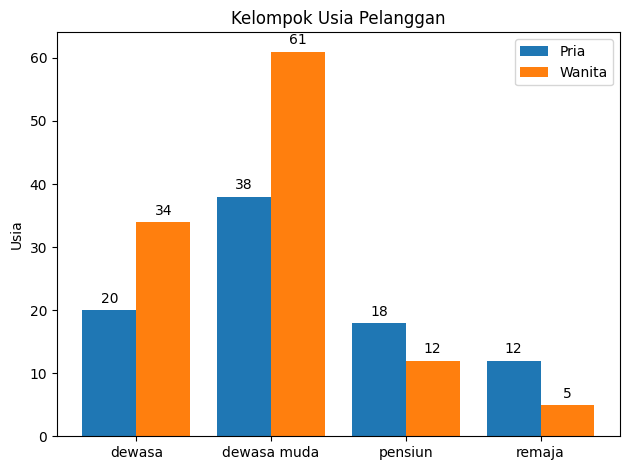

In [ ]:
#Menggabungkan tampilan jumlah kelompok usia Male dan Female dengan grouped bar
labels = shopping_group['Range Usia'].unique()
x = np.arange(len(labels))
width = 0.4 #lebar bar

fig, ax = plt.subplots()
Male_bar = ax.bar(x - width/2, Male_group['Jumlah Pelanggan'], width, label = 'Pria')
Female_bar = ax.bar(x + width/2, Female_group['Jumlah Pelanggan'], width, label = 'Wanita')

#menampilkan angka setiap bar
ax.bar_label(Male_bar, padding=3)
ax.bar_label(Female_bar, padding=3)

ax.set_ylabel('Usia')
ax.set_title('Kelompok Usia Pelanggan')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

Menentukan Annual Income & Spending Score Berdasarkan Genre dan Usia

In [ ]:
#Mengelompokkan 'Annual Income (k$)' dan 'Spending Score (1-100)' berdasarkan 'Genre' dan 'Range Usia', serta mengambil agregasinya (yaitu nilai rata-rata atau mean) berdasarkan pengelompokan tersebut
group_income = dataset_shopping.groupby(['Genre', 'Range Usia']).mean()[['Annual Income (k$)', 'Spending Score (1-100)']]
print(group_income)

                    Annual Income (k$)  Spending Score (1-100)
Genre  Range Usia                                             
Female dewasa                60.735294               35.617647
       dewasa muda           60.229508               62.721311
       pensiun               54.250000               41.750000
       remaja                49.200000               46.600000
Male   dewasa                63.100000               35.450000
       dewasa muda           69.157895               62.210526
       pensiun               53.500000               37.222222
       remaja                51.916667               43.833333


Visualisasi Annual Income Berdasarkan Genre dan Usia

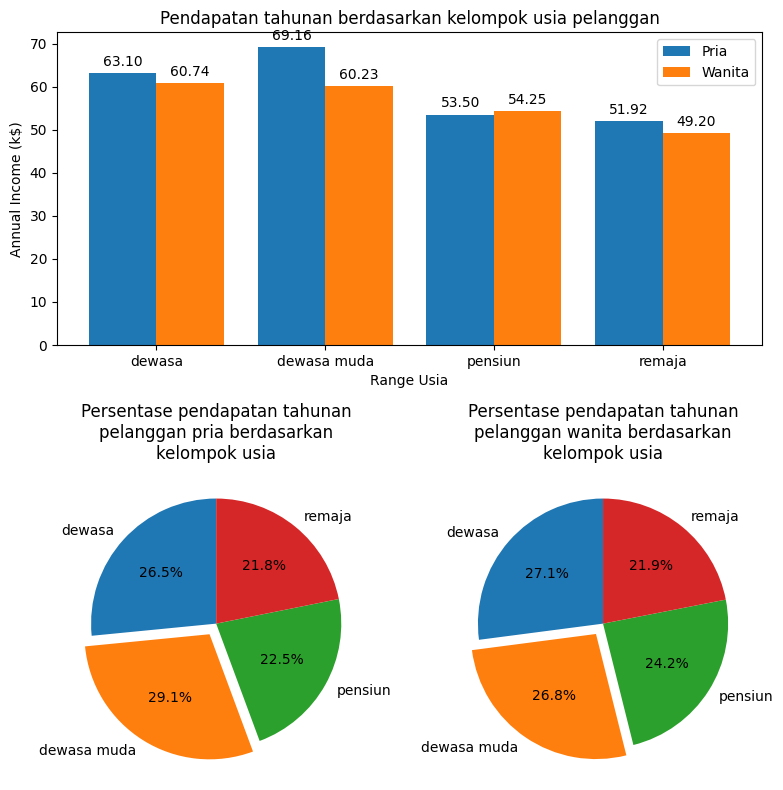

In [ ]:
#Mengelompokkan 'Annual Income (k$)' dan 'Spending Score (1-100)' berdasarkan 'Genre' dan 'Range Usia', serta mengambil agregasinya (yaitu nilai rata-rata atau mean) berdasarkan pengelompokan tersebut
group_income = dataset_shopping.groupby(['Genre', 'Range Usia']).mean()[['Annual Income (k$)', 'Spending Score (1-100)']].reset_index()

#Pisahkan ke dalam masing-masing Genre
male_group = group_income[group_income['Genre']=='Male']
female_group = group_income[group_income['Genre']=='Female']

#Import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = group_income['Range Usia'].unique()
x = np.arange(len(labels))

fig = plt.figure(figsize=(8,8))
#Plotkan ke dalam grouped bar chart
ax1 = plt.subplot(211)
width = 0.4
male_bar = ax1.bar(x - width/2, male_group['Annual Income (k$)'], width, label='Pria')
female_bar = ax1.bar(x + width/2, female_group['Annual Income (k$)'], width, label='Wanita')

#menampilkan angka setiap bar
ax1.bar_label(male_bar, padding=3, fmt='%.2f')
ax1.bar_label(female_bar, padding=3, fmt='%.2f')
ax1.set_xlabel('Range Usia')
ax1.set_ylabel('Annual Income (k$)')
ax1.set_title('Pendapatan tahunan berdasarkan kelompok usia pelanggan')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

#Plotkan ke dalam pie chart untuk setiap genre
exploding = [0, 0.1, 0, 0]
ax2 = plt.subplot(223)
ax2.pie(male_group['Annual Income (k$)'], labels=male_group['Range Usia'], explode=exploding, autopct='%1.1f%%', startangle=90)
ax2.set_title('Persentase pendapatan tahunan\npelanggan pria berdasarkan\nkelompok usia')

ax2 = plt.subplot(224)
ax2.pie(female_group['Annual Income (k$)'], labels=female_group['Range Usia'], explode=exploding, autopct='%1.1f%%', startangle=90)
ax2.set_title('Persentase pendapatan tahunan\npelanggan wanita berdasarkan\nkelompok usia')

plt.tight_layout()
plt.show()

Visualisasi Spending Score Berdasarkan Genre dan Usia

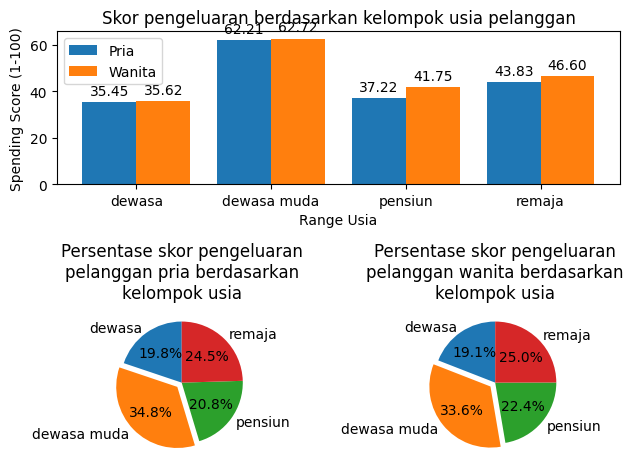

In [ ]:
#Plotkan ke dalam grouped bar chart
ax1 = plt.subplot(211)
width = 0.4
male_bar = ax1.bar(x - width/2, male_group['Spending Score (1-100)'], width, label='Pria')
female_bar = ax1.bar(x + width/2, female_group['Spending Score (1-100)'], width, label='Wanita')

#menampilkan angka setiap bar
ax1.bar_label(male_bar, padding=3, fmt='%.2f')
ax1.bar_label(female_bar, padding=3, fmt='%.2f')
ax1.set_xlabel('Range Usia')
ax1.set_ylabel('Spending Score (1-100)')
ax1.set_title('Skor pengeluaran berdasarkan kelompok usia pelanggan')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

#Plotkan ke dalam pie chart untuk setiap genre
exploding = [0, 0.1, 0, 0]
ax2 = plt.subplot(223)
ax2.pie(male_group['Spending Score (1-100)'], labels=male_group['Range Usia'], explode=exploding, autopct='%1.1f%%', startangle=90)
ax2.set_title('Persentase skor pengeluaran\npelanggan pria berdasarkan\nkelompok usia')

ax2 = plt.subplot(224)
ax2.pie(female_group['Spending Score (1-100)'], labels=female_group['Range Usia'], explode=exploding, autopct='%1.1f%%', startangle=90)
ax2.set_title('Persentase skor pengeluaran\npelanggan wanita berdasarkan\nkelompok usia')

plt.tight_layout()
plt.show()


Data Sales

In [ ]:
#Menyimpan data ke dalam dataframe
dataset_retail = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', delimiter=';')
print('Lima data teratas dataset_retail:')
print('--------------------------------:')
print(dataset_retail.head())

Lima data teratas dataset_retail:
--------------------------------:
   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  


In [ ]:
#Melihat tipe data
print('\nMelihat tipe data:')
print('------------------')
dataset_retail.info()


Melihat tipe data:
------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


In [ ]:
#Menentukan statistik deskriptif dataset
print('\nStatistik deskriptif:')
print('---------------------')
print(dataset_retail.describe())


Statistik deskriptif:
---------------------
                  no        Row_Num    Customer_ID  First_Transaction  \
count  100000.000000  100000.000000  100000.000000       1.000000e+05   
mean    50000.500000   50000.500000  193083.996940       1.492184e+12   
std     28867.657797   28867.657797  200747.292955       3.948432e+10   
min         1.000000       1.000000     654.000000       1.362729e+12   
25%     25000.750000   25000.750000   60994.500000       1.467106e+12   
50%     50000.500000   50000.500000  121441.000000       1.499012e+12   
75%     75000.250000   75000.250000  196023.000000       1.523675e+12   
max    100000.000000  100000.000000  846213.000000       1.549061e+12   

       Last_Transaction  Average_Transaction_Amount  Count_Transaction  
count      1.000000e+05                1.000000e+05      100000.000000  
mean       1.509970e+12                1.373157e+06          11.698500  
std        3.563295e+10                1.544435e+06          35.417324  
min  

In [ ]:
# Menampilkan jumlah nilai null per kolom
print(dataset_retail.isnull().sum())

no                            0
Row_Num                       0
Customer_ID                   0
Product                       0
First_Transaction             0
Last_Transaction              0
Average_Transaction_Amount    0
Count_Transaction             0
dtype: int64


In [ ]:
#Mencari total jumlah penjualan dari setiap produk
product_transaction = dataset_retail.groupby('Product').sum().reset_index()
print('\nTotal penjualan untuk setiap produk:')
print('-----------------------------------:')
print(product_transaction)



Total penjualan untuk setiap produk:
-----------------------------------:
  Product          no     Row_Num  Customer_ID  First_Transaction  \
0    Baju   200994861   200994861    560968748   5195390604620031   
1   Jaket  1861090219  1861090219   7286238627  52398117377914498   
2  Sepatu  2269841009  2269841009   8737252346  72699675498985351   
3     Tas   668123911   668123911   2723939973  18925186370100010   

    Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0   5202389780522906                  5213931707               8529  
1  52836559807019186                 47974040787             266604  
2  73933014534495903                 68886768665             795615  
3  19025031892544470                 15240994641              99102  


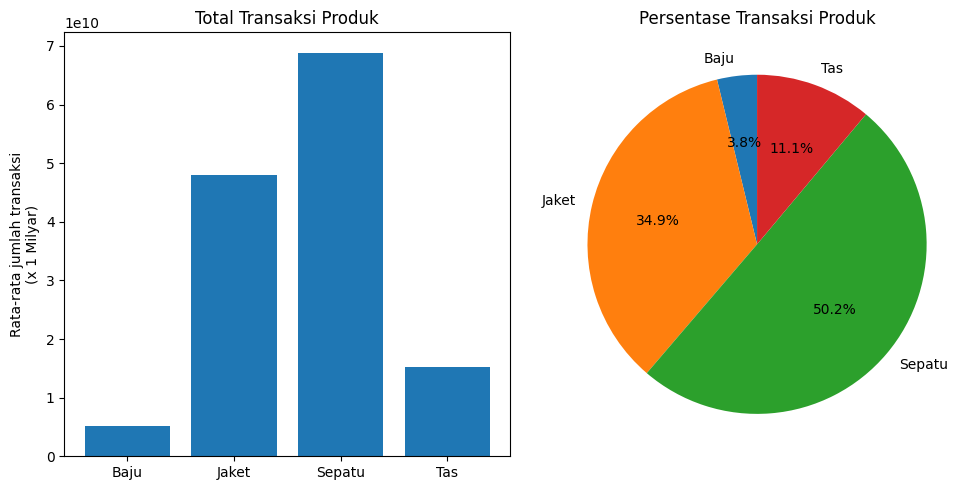

In [ ]:
#Menampilkan visualisasi dari jumlah transaksi tiap produk
fig = plt.figure(figsize=(10,5))

#Plot diagram batang
ax1 = plt.subplot(121)
ax1.bar(product_transaction['Product'], product_transaction['Average_Transaction_Amount'])
ax1.set_ylabel('Rata-rata jumlah transaksi\n(x 1 Milyar)')
ax1.set_title('Total Transaksi Produk')

#Plot persentase dengan pie chart
ax2 = plt.subplot(122)
ax2.pie(product_transaction['Average_Transaction_Amount'], labels=product_transaction['Product'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Persentase Transaksi Produk')

plt.tight_layout()
plt.show()

Data Keuangan

In [ ]:
pd.set_option('display.max_column', 10)

#Membaca dan menampilkan dataset
dataset_worldbank = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/atmajaya/worldbank.csv', delimiter=',', encoding='cp1252')

In [ ]:
#Melihat tipe data database worldbank.csv
print('\nInformasi dataset_worldbank:')
print('============================')
dataset_worldbank.info()


Informasi dataset_worldbank:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14784 entries, 0 to 14783
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14784 non-null  object 
 1   year              14784 non-null  int64  
 2   trend             14784 non-null  int64  
 3   inflation         9193 non-null   float64
 4   redenomination    14784 non-null  int64  
 5   trade             10342 non-null  float64
 6   realgdppercapita  5908 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 808.6+ KB


In [ ]:
# Menampilkan jumlah nilai null per kolom
print(dataset_worldbank.isnull().sum())

country                0
year                   0
trend                  0
inflation           5591
redenomination         0
trade               4442
realgdppercapita    8876
dtype: int64


In [ ]:
#Mengganti baris data yang kosong dengan nilai 0
dataset_worldbank = dataset_worldbank.fillna(0)

In [ ]:
#Melihat tipe data database worldbank.csv
print('\nInformasi dataset_worldbank setelah .fillna(0):')
print('===============================================')
dataset_worldbank.info()


Informasi dataset_worldbank setelah .fillna(0):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14784 entries, 0 to 14783
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14784 non-null  object 
 1   year              14784 non-null  int64  
 2   trend             14784 non-null  int64  
 3   inflation         14784 non-null  float64
 4   redenomination    14784 non-null  int64  
 5   trade             14784 non-null  float64
 6   realgdppercapita  14784 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 808.6+ KB


In [ ]:
#Data worldbank dari tahun ... sampai tahun ...
print('\nData worldbank dari tahun ... sampai tahun ...')
print('==============================================')
print(dataset_worldbank['year'].unique())


Data worldbank dari tahun ... sampai tahun ...
[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]


Text(0.5, 1.0, 'GDP per Kapita untuk Empat Negara ASEAN')

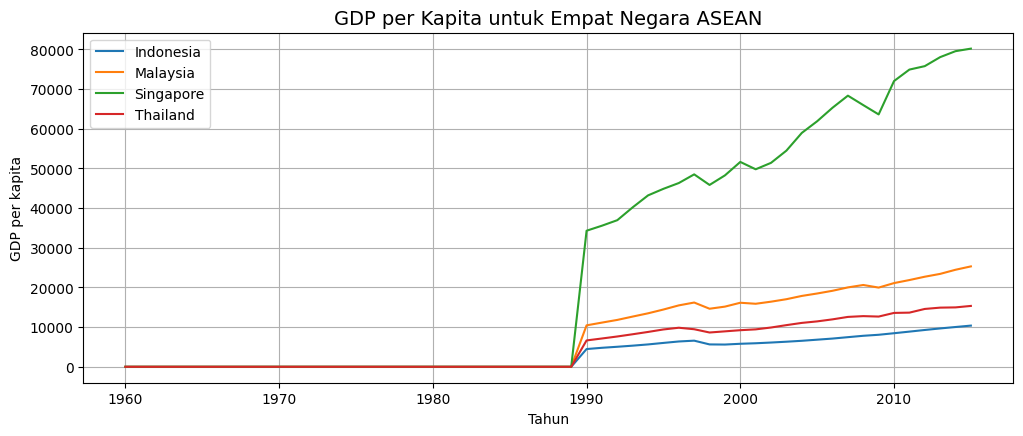

In [ ]:
#GDP negara Indonesia, Malaysia, Singapore, dan Thailand
dataset_indonesia = dataset_worldbank[dataset_worldbank['country']=='Indonesia']
dataset_malaysia = dataset_worldbank[dataset_worldbank['country']=='Malaysia']
dataset_singapore = dataset_worldbank[dataset_worldbank['country']=='Singapore']
dataset_thailand = dataset_worldbank[dataset_worldbank['country']=='Thailand']

fig = plt.figure(figsize=(12, 10))
ax1 = plt.subplot(211)
ax1.plot(dataset_indonesia['year'], dataset_indonesia['realgdppercapita'], label='Indonesia')
ax1.plot(dataset_malaysia['year'], dataset_malaysia['realgdppercapita'], label='Malaysia')
ax1.plot(dataset_singapore['year'], dataset_singapore['realgdppercapita'], label='Singapore')
ax1.plot(dataset_thailand['year'], dataset_thailand['realgdppercapita'], label='Thailand')
ax1.legend()
ax1.grid()
ax1.set_xlabel('Tahun')
ax1.set_ylabel('GDP per kapita')
ax1.set_title('GDP per Kapita untuk Empat Negara ASEAN', fontsize=14)


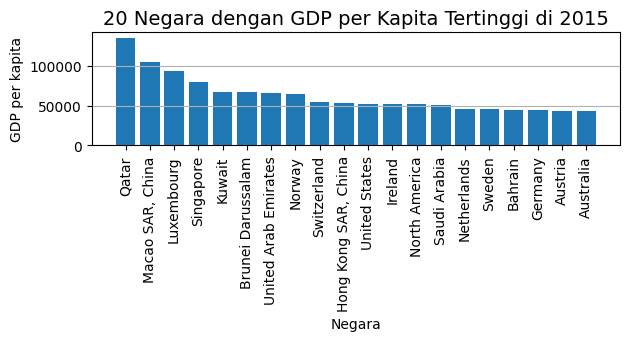

In [ ]:
#20 negara dengan GDP per kapita tertinggi di tahun 2015
dataset_2015 = dataset_worldbank[dataset_worldbank['year']==2015].nlargest(20, 'realgdppercapita')
ax2 = plt.subplot(212)
ax2.bar(dataset_2015['country'], dataset_2015['realgdppercapita'])
ax2.grid(axis='y')
ax2.set_xlabel('Negara')
ax2.set_ylabel('GDP per kapita')
ax2.set_title('20 Negara dengan GDP per Kapita Tertinggi di 2015', fontsize=14)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Untuk grafik dengan judul GDP per Kapita 4 Negara ASEAN memperlihatkan Singapura adalah negara denga GDP per kapita tertinggi yang kemudian secara berurut dibawahnya yaitu Malaysia, Thailand, dan Indonesia. Data GDP ini baru tersedia di tahun 1990 dengan data dari tahun 1960 hingga 1989 tidak terekam.

Untuk grafik berikutnya dengan judul 20 Negara dengan GDP per Kapita Tertinggi di 2015 terlihat jelas Qatar yang paling tinggi dan diikuti oleh Macao SAR - China. Kedua negara ini memiliki GDP per kapita di atas 100000 tiap penduduknya.